# Classification 분류

##### **활성 함수**

- node의 결과를 변환시켜 주는 역할

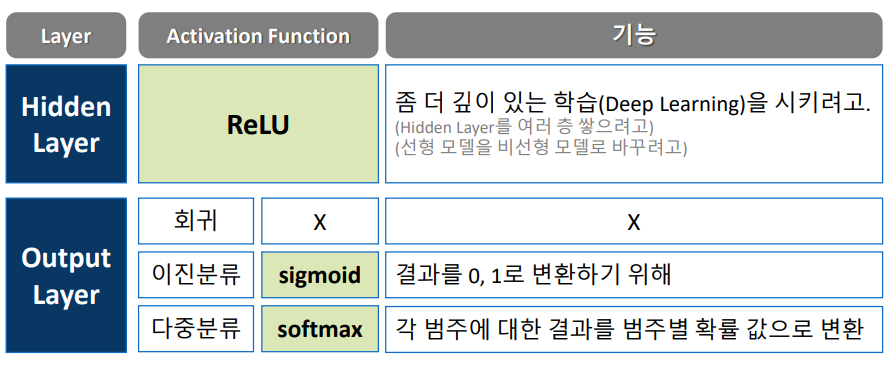

- **시그모이드(sigmoid)** : 0~1 사이 확률 값으로 변환해주는 역할

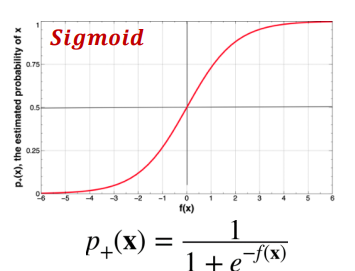

**Regression vs Classification**

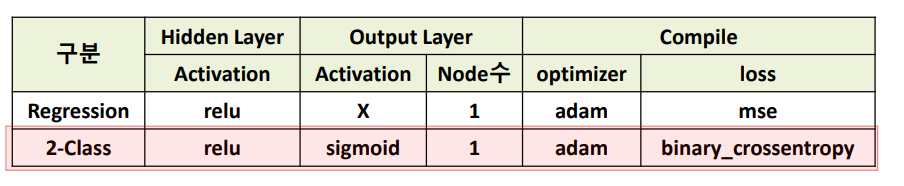

$ $

In [11]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

# 1. Classification: CHNURN

### 1. 데이터 전처리
- 데이터 준비
- 가변수화
- 스케일링(필요시)
- 데이터 분할

**1) 데이터준비**

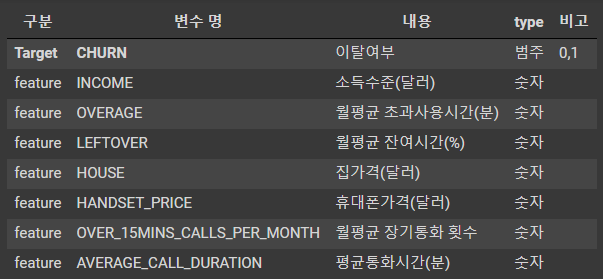


In [2]:
# 데이터 준비

path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_churn_simple.csv"
data = pd.read_csv(path)
data['CHURN'] = data['CHURN'].map({'STAY':0, 'LEAVE':1})
data.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
0,31953,0,6,313378,161,0,4,0
1,36147,0,13,800586,244,0,6,0
2,27273,230,0,305049,201,16,15,0
3,120070,38,33,788235,780,3,2,1
4,29215,208,85,224784,241,21,1,0


In [3]:
# target 설정

target = 'CHURN'
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 가변수화**

**3) 데이터분할**

In [4]:
# 데이터분할 

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 20)


**4) Scaling**

In [5]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

$ $

$ $

### 2. 모델링
- 필요한 함수 불러오기
- 모델 선언
- 학습
- 예측
- 성능 검증

**1) 모델 선언**

In [8]:
# 모델 선언
nfeatures = x_train.shape[1]   #num of columns

# 확인
nfeatures

7

In [9]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([ Dense(1, input_shape = (nfeatures,), activation = 'sigmoid') ])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile

model.compile(optimizer='adam', loss='binary_crossentropy')

**2) 학습**

In [11]:
# 학습하기
model.fit(x_train, y_train)

500/500 [==============================] - 1s 1ms/step - loss: 0.6836


**3) 예측**

In [12]:
# 예측하기
pred = model.predict(x_val)
pred = np.where(pred>= 0.5, 1, 0)

125/125 [==============================] - 0s 1ms/step


**4) 검증**

In [13]:
# 검증
print(confusion_matrix(y_val, pred))
print('-'*50)
print(classification_report(y_val, pred))

[[1305  733]
 [ 852 1110]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.64      0.62      2038
           1       0.60      0.57      0.58      1962

    accuracy                           0.60      4000
   macro avg       0.60      0.60      0.60      4000
weighted avg       0.60      0.60      0.60      4000



$ $

$ $

---

# 2. Classification: Titanic1

### 1. 데이터 준비

In [16]:
# 데이터 불러오기

path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [4]:
# 데이터 준비
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
x = data.loc[:, features]
y = data.loc[:, target]

In [5]:
# 가변수화
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,1
1,38.0,71.2833,0
2,26.0,7.9250,0
3,35.0,53.1000,0
4,35.0,8.0500,1


In [6]:
# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

In [7]:
# Scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

$ $

### 2. 모델설계

In [8]:
# 모델 선언
nfeatures = x_train.shape[1]   #num of columns

# 확인
nfeatures

3

In [9]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential(Dense(1, input_shape=(nfeatures,), activation='sigmoid'))

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile
model.compile(optimizer=Adam(lr=0.01), loss ='binary_crossentropy' )

# 학습
history = model.fit(x_train, y_train, 
                    epochs = 50, validation_split=0.2).history

Epoch 1/50


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


16/16 [==============================] - 1s 19ms/step - loss: 0.5999 - val_loss: 0.5864
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5882 - val_loss: 0.5741
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5774 - val_loss: 0.5633
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5685 - val_loss: 0.5532
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5598 - val_loss: 0.5463
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5522 - val_loss: 0.5393
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5456 - val_loss: 0.5324
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5398 - val_loss: 0.5267
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5347 - val_loss: 0.5221
Epoch 10/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5304 - val_loss: 0.5188
Epoch 11/50
16/16 [==========

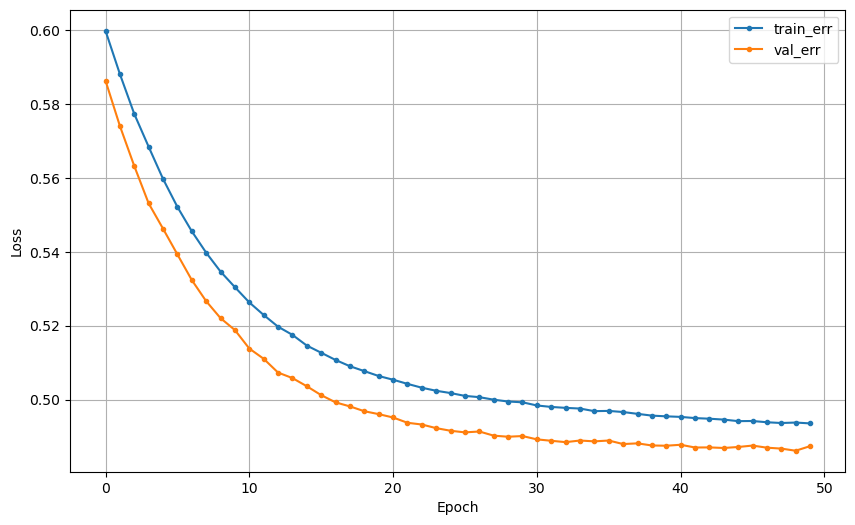

In [13]:
# 학습결과 그래프
dl_history_plot(history)

$ $

### 3. 예측 및 검증

In [14]:
# 예측
pred = model.predict(x_val)

# 0 과 1로 만들어줌
pred = np.where(pred>=0.5, 1, 0)

# activation이 sigmoid ==> 0 ~ 1 사이의 확률값.
# 그러므로 cut-of value( 보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.

9/9 [==============================] - 0s 2ms/step


In [15]:
# 검증
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       170
           1       0.70      0.68      0.69        98

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



$ $

$ $

---

# 3. Classification: Titanic2

### 1. 데이터 전처리

In [17]:
# 데이터 준비
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [18]:
# 가변수화

cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

In [19]:
# 데이터 분할

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

In [20]:
# 스케일링 

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

$ $

### 2. 모델링

In [21]:
# 모델 설계
n = x_train.shape[1]
n

8

In [22]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential([Dense(2, input_shape=(n,), activation='relu'),
                    Dense(1, activation='sigmoid')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [23]:
# compile
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy')

# 학습
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2).history

Epoch 1/50
16/16 [==============================] - 1s 12ms/step - loss: 0.6973 - val_loss: 0.6760
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6733 - val_loss: 0.6583
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6622 - val_loss: 0.6443
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6505 - val_loss: 0.6274
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6306 - val_loss: 0.5976
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6010 - val_loss: 0.5677
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5659 - val_loss: 0.5275
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5276 - val_loss: 0.4850
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4943 - val_loss: 0.4626
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4787 - val_loss: 0.4467
Epoch 11/50
16/16 

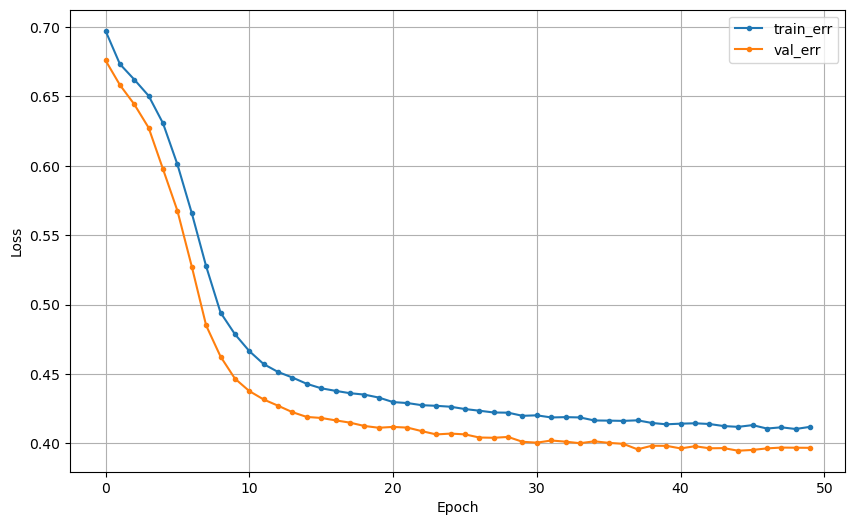

In [24]:
# 학습결과 그래프
dl_history_plot(history)

### 3. 예측 및 검증

In [25]:
# 예측
pred2 = model.predict(x_val)
pred2 = np.where(pred2>=0.5, 1, 0)

# 검증
print(classification_report(y_val, pred2))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       170
           1       0.77      0.57      0.65        98

    accuracy                           0.78       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.78      0.78      0.77       268



$ $

$ $

---

# 4. Classification: Attrition

### 1. 데이터 준비

In [26]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_train_validation.CSV"
data = pd.read_csv(path)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,20,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2
5,1,22,Travel_Frequently,Research & Development,4,1,Technical Degree,593,3,Male,...,No,16,3,0,4,3,3,2,2,2
6,0,24,Travel_Rarely,Research & Development,21,2,Technical Degree,1551,3,Male,...,No,14,2,3,2,3,3,1,1,0
7,0,34,Travel_Rarely,Research & Development,8,3,Medical,2068,2,Male,...,No,12,1,0,6,3,4,4,3,2
8,0,30,Travel_Rarely,Research & Development,20,3,Other,1084,3,Male,...,No,15,3,1,7,1,2,6,2,2
9,0,26,Travel_Rarely,Research & Development,6,3,Life Sciences,686,3,Female,...,Yes,13,3,1,3,2,3,3,2,2


In [27]:
# target 설정
target = 'Attrition'

# 불필요한 변수 제거
data.drop('EmployeeNumber', axis = 1, inplace = True)

# x, y 분리
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [28]:
# 가변수화
dum_cols = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender', 
            'JobRole', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'RelationshipSatisfaction',
            'StockOptionLevel','WorkLifeBalance' ]

x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)
x.head()



,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,...,OverTime_Yes,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,33,7,11691,0,11,14,3,13,9,7,...,0,0,0,1,0,0,0,0,0,1
1,35,18,9362,2,11,10,2,2,2,2,...,0,0,1,0,0,0,0,0,1,0
2,42,6,13348,9,13,18,3,13,7,7,...,0,1,0,0,1,0,0,0,0,1
3,46,2,17048,8,23,28,2,26,15,9,...,0,0,0,0,0,0,0,0,1,0
4,39,20,4127,2,18,7,6,2,1,2,...,0,0,0,1,1,0,0,0,1,0


In [29]:
# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 200, random_state = 2022)

In [30]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

$ $

### 2. 모델링

In [31]:
# 모델 설계
n = x_train.shape[1]
n

53

In [33]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential([Dense(8, input_shape=(n,), activation='relu'),
                    Dense(4, activation='relu'),
                    Dense(1, activation='sigmoid')])

# 모델확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 432       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 473
Trainable params: 473
Non-trainable params: 0
_________________________________________________________________


In [35]:
# compile
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy')

# 학습
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2).history

Epoch 1/30
27/27 [==============================] - 1s 6ms/step - loss: 0.5011 - val_loss: 0.3955
Epoch 2/30
27/27 [==============================] - 0s 3ms/step - loss: 0.4121 - val_loss: 0.3694
Epoch 3/30
27/27 [==============================] - 0s 3ms/step - loss: 0.3778 - val_loss: 0.3514
Epoch 4/30
27/27 [==============================] - 0s 3ms/step - loss: 0.3523 - val_loss: 0.3748
Epoch 5/30
27/27 [==============================] - 0s 3ms/step - loss: 0.3471 - val_loss: 0.3717
Epoch 6/30
27/27 [==============================] - 0s 3ms/step - loss: 0.3291 - val_loss: 0.3451
Epoch 7/30
27/27 [==============================] - 0s 3ms/step - loss: 0.3167 - val_loss: 0.3409
Epoch 8/30
27/27 [==============================] - 0s 3ms/step - loss: 0.3039 - val_loss: 0.3586
Epoch 9/30
27/27 [==============================] - 0s 3ms/step - loss: 0.3005 - val_loss: 0.3483
Epoch 10/30
27/27 [==============================] - 0s 3ms/step - loss: 0.2807 - val_loss: 0.3857
Epoch 11/30
27/27 [

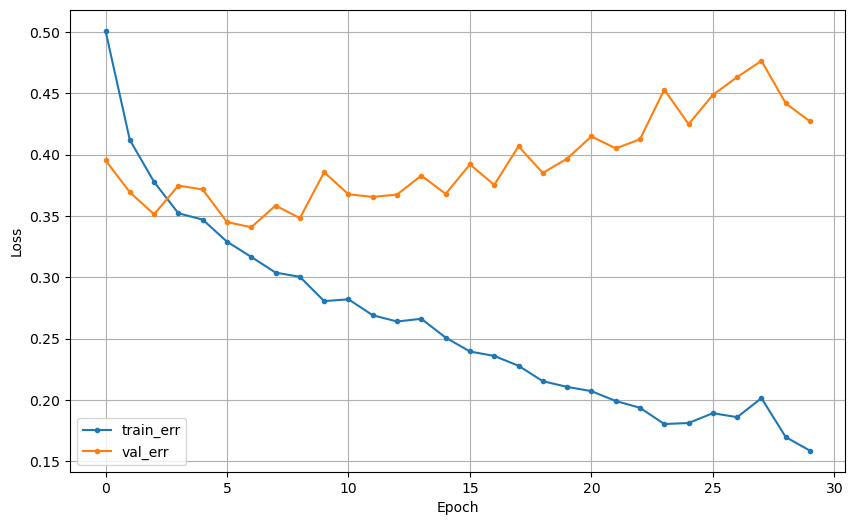

In [36]:
# 학습결과 그래프
dl_history_plot(history)

### 3. 예측 및 검증

In [37]:
# 예측
pred2 = model.predict(x_val)
pred2 = np.where(pred2>=0.5, 1, 0)

# 검증
print(classification_report(y_val, pred2))

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       169
           1       0.48      0.48      0.48        31

    accuracy                           0.84       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.84      0.84      0.84       200

